# Module 7 Project: Task 3
# 10.16 Intro to Data Science: Time Series and Simple Linear Regression 

Author: [Inga Miller](https://github.com/s566319) Repository: https://github.com/s566319/datafun-07-ml-predictive
Date- 6/21/2023

## Loading data

In [72]:
# Section 1-Load: Store each Fahrenheit/Celsius pair as a tuple in temps: 

%matplotlib inline
c = lambda f: 5 / 9 * (f - 32)

In [73]:
temps = [(f, c(f)) for f in range(0, 101, 10)]

In [74]:
import pandas as pd

In [75]:
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])

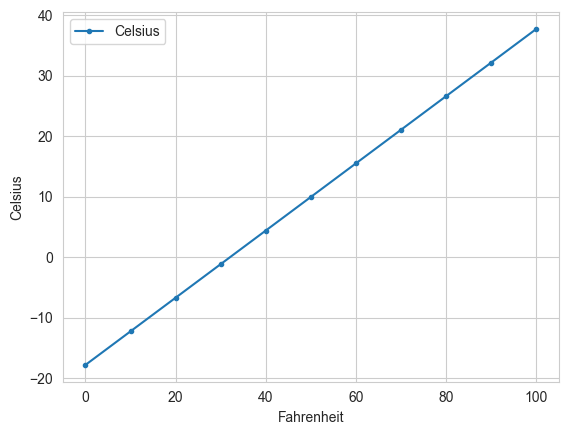

In [76]:
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')

y_label = axes.set_ylabel('Celsius')

## Loading the Average High Temperatures into a `DataFrame` 

In [77]:
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

In [78]:
nyc.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [79]:
nyc.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


## Cleaning the Data

In [80]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']

In [81]:
nyc.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [82]:
nyc.Date.dtype

dtype('int64')

In [83]:
nyc.Date = nyc.Date.floordiv(100)

In [84]:
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


## Calculating Basic Descriptive Statistics for the Dataset

In [85]:
pd.set_option('precision', 2)

OptionError: Pattern matched multiple keys

In [ ]:
nyc.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

## Forecasting Future January Average High Temperatures

In [ ]:
from scipy import stats

In [ ]:
linear_regression = stats.linregress(x=nyc.Date,
                                     y=nyc.Temperature)

In [ ]:
linear_regression.slope

0.014771361132966163

In [ ]:
linear_regression.intercept

8.694993233674289

In [ ]:
linear_regression.slope * 2026 + linear_regression.intercept

38.62177088906374

## Plotting the Average High Temperatures and a Regression Line 

In [ ]:
import seaborn as sns

In [ ]:
sns.set_style('whitegrid')

(10.0, 70.0)

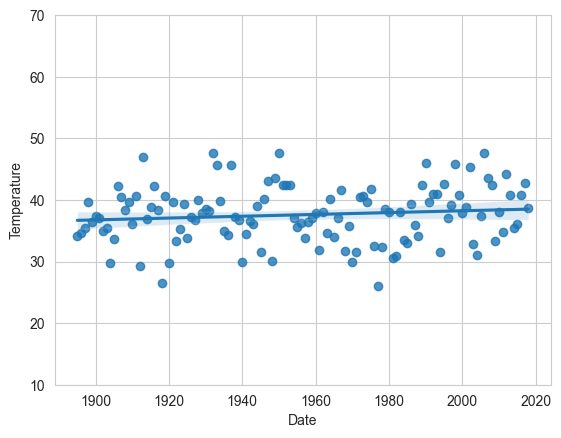

In [ ]:
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)

axes.set_ylim(10, 70)

# 15.4 Case Study

In [ ]:
%matplotlib inline
import pandas as pd

nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

nyc.columns = ['Date', 'Temperature', 'Anomaly']

nyc.Date = nyc.Date.floordiv(100)

nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


## Splitting the Data for Training and Testing

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
     nyc.Date.values.reshape(-1, 1), nyc.Temperature.values, 
     random_state=11)

In [ ]:
X_train.shape

(93, 1)

In [ ]:
X_test.shape

(31, 1)

## Training the Model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linear_regression = LinearRegression()

In [ ]:
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [ ]:
linear_regression.coef_

array([0.01939167])

In [ ]:
linear_regression.intercept_

-0.30779820252656265

## Testing the Model

In [ ]:
predicted = linear_regression.predict(X_test)

In [ ]:
expected = y_test

In [ ]:
for p, e in zip(predicted[::5], expected[::5]):
     print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


## Predicting Future Temperatures and Estimating Past Temperatures 

In [ ]:
predict = (lambda x: linear_regression.coef_ * x + 
                      linear_regression.intercept_)

In [ ]:
predict(2026)

array([38.97973189])

## Visualizing the Dataset with the Regression Line

In [ ]:
import seaborn as sns

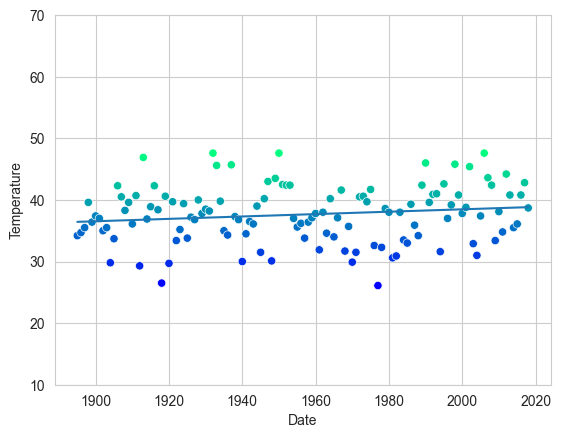

In [ ]:
axes = sns.scatterplot(data=nyc, x='Date', y='Temperature',
     hue='Temperature', palette='winter', legend=False)

axes.set_ylim(10, 70)

import numpy as np

x = np.array([min(nyc.Date.values), max(nyc.Date.values)])

y = predict(x)

import matplotlib.pyplot as plt 

line = plt.plot(x, y)

# Conclusion: Both methods produced nearly identical graphs.
# Chapter 10 method used Seaborn's regplot function to create a scatter plot; we then used those values to predict 2026 temperature.  Chapter 15 used scikit-learn estimator and Seaborn's scatterplot function, along with Matplotlib's plot function.